<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/Ricardo_Bastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

Carregando base de casos de Covid-19 Fonte: https://brasil.io/dataset/covid19/caso/

---  Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
- 0   date                            data da coleta yyyy-mm-dd
- 1   state                           sigla da unidade federativa, exemplo: SP
- 2   city                            nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).
- 3   place_type                      tipo de local que esse registro descreve, pode ser city ou state.
- 4   confirmed                       número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- 5   deaths                          número de mortes
- 6   order_for_place                 tipo de local que esse registro descreve, pode ser city ou state.
- 7   is_last                         campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
- 8   estimated_population_2019       população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.
- 9   estimated_population            população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).
- 10  city_ibge_code                  código IBGE do local.
- 11  confirmed_per_100k_inhabitants  número de casos confirmados por 100.000 habitantes (baseado em estimated_population).
- 12  death_rate                      taxa de mortalidade (mortes / confirmados).

In [2]:
data_raw = pd.read_csv('/content/drive/My Drive/Boot Camp Alura/caso.csv')

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950679 entries, 0 to 950678
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            950679 non-null  object 
 1   state                           950679 non-null  object 
 2   city                            944245 non-null  object 
 3   place_type                      950679 non-null  object 
 4   confirmed                       950679 non-null  int64  
 5   deaths                          950679 non-null  int64  
 6   order_for_place                 950679 non-null  int64  
 7   is_last                         950679 non-null  bool   
 8   estimated_population_2019       946976 non-null  float64
 9   estimated_population            946976 non-null  float64
 10  city_ibge_code                  946976 non-null  float64
 11  confirmed_per_100k_inhabitants  933529 non-null  float64
 12  death_rate      

In [4]:
data_raw.columns 

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [5]:
data = data_raw[[ 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 
       'confirmed_per_100k_inhabitants', 'death_rate']]
data.insert(0,'date',pd.to_datetime(data_raw.date))
data.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate
0,2020-11-09,AC,NaN,state,31788,701,238,True,881935.0,894470.0,3553.83635,0.0221
1,2020-11-08,AC,NaN,state,31707,699,237,False,881935.0,894470.0,3544.78071,0.0220
2,2020-11-07,AC,NaN,state,31575,699,236,False,881935.0,894470.0,3530.02337,0.0221
3,2020-11-06,AC,NaN,state,31326,697,235,False,881935.0,894470.0,3502.18565,0.0222
4,2020-11-05,AC,NaN,state,31248,697,234,False,881935.0,894470.0,3493.46540,0.0223


In [6]:
#segmentações

data_states = data[data.place_type=='state']
data_citys = data[data.place_type=='city']
data_states_islast = data_states[data_states.is_last==True]
data_citys_islast = data_citys[data_citys.is_last==True]

In [7]:
confirmed_states= data_states.pivot(index='date',columns='state',values='confirmed')
confirmed_states.loc['2020-02-25'].fillna(0,inplace=True)
confirmed_states.fillna(method="ffill",axis=0,inplace=True)
data_diarios_states = confirmed_states.diff(1)

In [8]:
data_diarios_states.rolling(15).mean

<bound method Rolling.mean of Rolling [window=15,center=False,axis=0]>

Text(0.5, 1.0, 'Casos Covid-19 e média movel 15 dias')

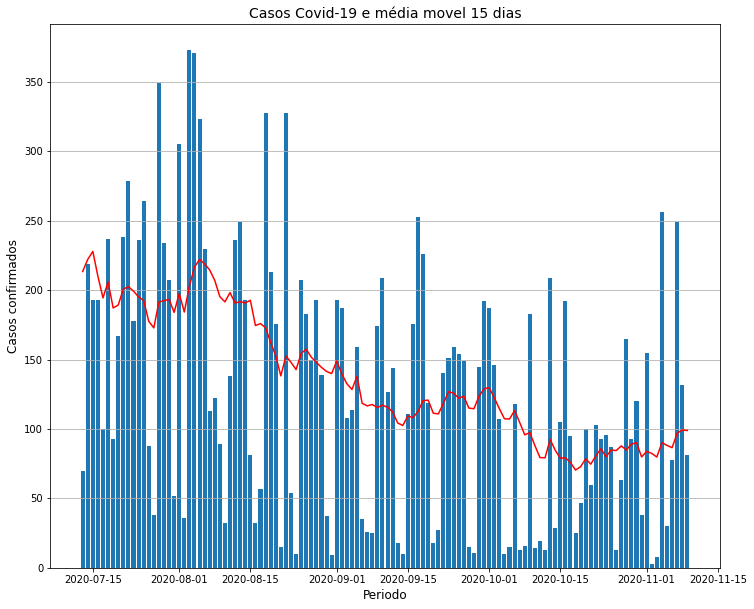

In [20]:
UF = 'AC'
window = 120
day_mean = 15
plt.figure(figsize=(12,10))
plt.grid(axis='y')
plt.bar(height=data_diarios_states[UF].tail(window).values,x=data_diarios_states[UF].tail(window).index)
plt.plot(data_diarios_states[UF].rolling(day_mean).mean().tail(window), color='r')
plt.xlabel('Periodo',fontdict={'fontsize':12})
plt.ylabel('Casos confirmados',fontdict={'fontsize':12})
plt.title('Casos Covid-19 e média movel {} dias'.format(day_mean),fontdict={'fontsize':14})